In [54]:
# imports
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import seaborn as sns
import numpy as np
import re

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,
							 mean_squared_error,
							 confusion_matrix,
							 ConfusionMatrixDisplay,
							 classification_report)

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

### Aufgabe
#### Arbeitszeit: 2 Tage, mit Zwischenabgabe
Lade den titanic-Datensatz und nutze das Wissen rund um Logistische Regression für deine Vorhersagen. Ergänze deine Modellentwicklung am morgigen Tag um geeignete Techniken aus dem Bereich Feature Engineering.
Folgende Dinge könntest du tun:
* Ersetze Nan-Werte durch geeignete Werte (Feature Engineering)
* Beseitige Spalten, die du für die Analyse nicht nutzen wirst
* Kodiere kategorische Spalten in geeigneter Weise (Feature Engineering)
* Bonus: Nutze die Power von regulären Ausdrücken, um aus der Namensspalte alle Mr. / Miss / Mrs. zu ziehen und diese Information ebenfalls sinnvoll zu kodieren
* Skaliere die Daten, wo nötig und wie nötig
* Splitte in train und test und lass die die Accuracy ausgeben
* Verschaffe dir einen Überblick auch über andere Metriken wie Recall, Precision und F1
* Produziere eine Confusionmatrix \


Und generell gilt: Tobe dich aus, spiel an Hyperparametern herum, arbeite Gitter ab und vergleich auch gern andere Algorithmen an diesem Datensatz.

In [55]:
# Load titanic data
data = pd.read_csv("titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


===Dataset Information===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

===Statistical summary===
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   2

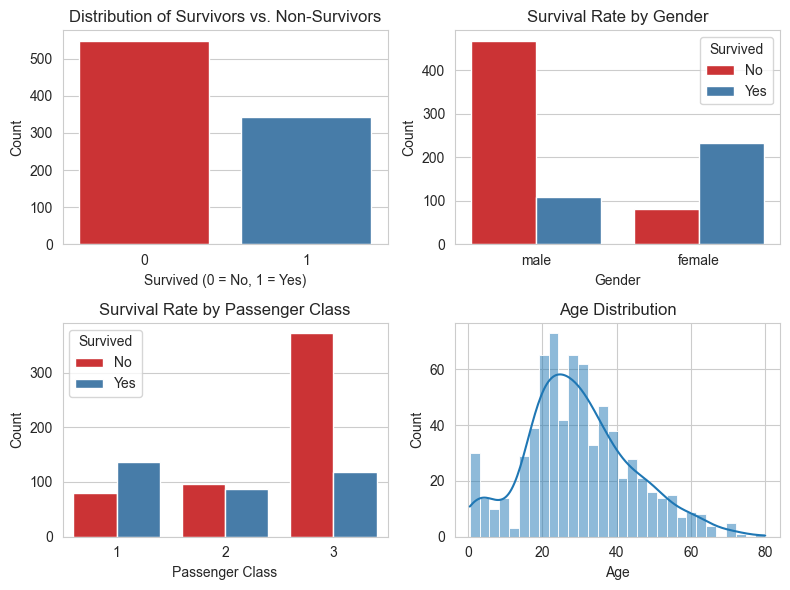

In [56]:
# Look @ data
print("===Dataset Information===")
print(data.info())
print("\n===Statistical summary===")
print(data.describe())
print("\n===Missing values per column===")
print(data.isna().sum())

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(8, 6))

# Distribution of target variable 'Survived'
sns.countplot(x="Survived", hue="Survived", data=data, palette="Set1", legend=False, ax=ax[0, 0])
ax[0, 0].set_title("Distribution of Survivors vs. Non-Survivors")
ax[0, 0].set_xlabel("Survived (0 = No, 1 = Yes)")
ax[0, 0].set_ylabel("Count")

# Survival rate by gender
sns.countplot(x="Sex", hue="Survived", data=data, palette="Set1", ax=ax[0, 1])
ax[0, 1].set_title("Survival Rate by Gender")
ax[0, 1].set_xlabel("Gender")
ax[0, 1].set_ylabel("Count")
ax[0, 1].legend(title="Survived", labels=["No", "Yes"])

# Survival rate by passenger class
sns.countplot(x="Pclass", hue="Survived", data=data, palette="Set1", ax=ax[1, 0])
ax[1, 0].set_title("Survival Rate by Passenger Class")
ax[1, 0].set_xlabel("Passenger Class")
ax[1, 0].set_ylabel("Count")
ax[1, 0].legend(title="Survived", labels=["No", "Yes"])

# Age distribution
sns.histplot(data["Age"].dropna(), kde=True, bins=30, ax=ax[1, 1])
ax[1, 1].set_title("Age Distribution")
ax[1, 1].set_xlabel("Age")
ax[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [57]:
# Preprocessing data
# Feature engineering

# How to handle missing values
data['Age'] = data['Age'].fillna(data['Age'].median())

# Fill with mode values
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Too much missing values
# Create a new binary feature
data['HasCabin'] = data['Cabin'].notna().astype(int)

# Drop unnecessary columns
data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Encoding Embarked with get_dummies
emb_dummies = pd.get_dummies(data['Embarked'], prefix='Embarked')
data = pd.concat([data, emb_dummies], axis=1)
data.drop('Embarked', axis=1, inplace=True)

# Binary encoding for Sex (male=0, female=1)
data["Sex"] = data["Sex"].map({"male": 0, "female": 1})

# Scaling numeric features
scaler = StandardScaler()
numeric_features = ["Age", "Fare"]
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [58]:
# Look @ data after Preprocessing
print("===Dataset Information===")
print(data.info())
print("\n===Statistical summary===")
print(data.describe())
print("\n===Missing values per column===")
print(data.isna().sum())
data

===Dataset Information===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   HasCabin    891 non-null    int64  
 8   Embarked_C  891 non-null    bool   
 9   Embarked_Q  891 non-null    bool   
 10  Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(6)
memory usage: 58.4 KB
None

===Statistical summary===
         Survived      Pclass         Sex           Age       SibSp  \
count  891.000000  891.000000  891.000000  8.910000e+02  891.000000   
mean     0.383838    2.308642    0.352413  2.272780e-16    0.523008   
std      0.486592    0.836071  

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,HasCabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,-0.565736,1,0,-0.502445,0,False,False,True
1,1,1,1,0.663861,1,0,0.786845,1,True,False,False
2,1,3,1,-0.258337,0,0,-0.488854,0,False,False,True
3,1,1,1,0.433312,1,0,0.420730,1,False,False,True
4,0,3,0,0.433312,0,0,-0.486337,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,-0.181487,0,0,-0.386671,0,False,False,True
887,1,1,1,-0.796286,0,0,-0.044381,1,False,False,True
888,0,3,1,-0.104637,1,2,-0.176263,0,False,False,True
889,1,1,0,-0.258337,0,0,-0.044381,1,True,False,False



===Samples===
TrainData: 712 Samples
TestData: 179 Samples

===Logistic Regression===
Accuracy: 0.8212


<Figure size 800x600 with 0 Axes>

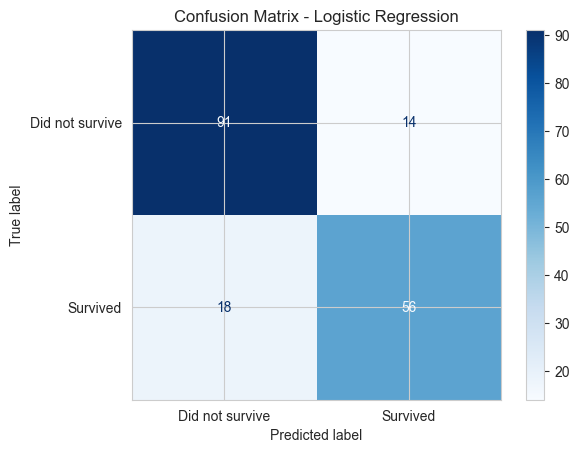


===Classification Report===
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



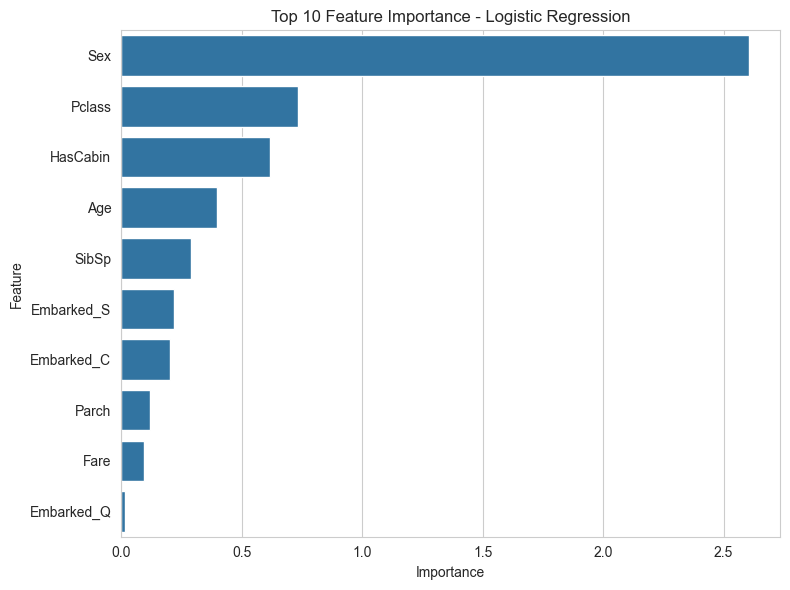


===Cross Validation (5-fold)===
Mean Accuracy: 0.7935
Std Accuracy: 0.0153


In [59]:
# Modeling and Evaluation

# Creating Features and Target
X = data.drop("Survived", axis=1)
y = data["Survived"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\n===Samples===")
print(f"TrainData: {X_train.shape[0]} Samples")
print(f"TestData: {X_test.shape[0]} Samples")

# Logistic Regression
print("\n===Logistic Regression===")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predictions 
lr_model_y_pred = lr_model.predict(X_test)

# Evaluation
lr_model_accuracy = accuracy_score(y_test, lr_model_y_pred)
print(f"Accuracy: {lr_model_accuracy:.4f}")

# Confusion Matrix
lr_model_cm = confusion_matrix(y_test, lr_model_y_pred)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(lr_model_cm, display_labels=["Did not survive", "Survived"]).plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Classification Report
print("\n===Classification Report===")
print(classification_report(y_test, lr_model_y_pred))

# Feature Importance
feature_importance = pd.DataFrame({
	"Feature": X.columns,
	"Importance": np.abs(lr_model.coef_[0])
})
feature_importance = feature_importance.sort_values("Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance.head(10))
plt.title("Top 10 Feature Importance - Logistic Regression")
plt.tight_layout()
plt.show()

# Cross Validation
cv_scores = cross_val_score(lr_model, X, y, cv=5)
print(f"\n===Cross Validation (5-fold)===")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Std Accuracy: {cv_scores.std():.4f}")

In [60]:
# Hyperparams Tuning with GridSearch

# Param-Grid for LinearRegression
param_grid = {
	"C": [0.01, 0.1, 1, 10, 100],
	"penalty": ["l1", "l2", "elasticnet", None],
	"solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
	"max_iter": [100, 500, 1000]
}

# Grid configuring based on Solver-Kompatibility
grid_params = [
	{"C": [0.01, 0.1, 1, 10, 100], "penalty": ["l2"], "solver": ["newton-cg", "lbfgs", "sag"]},
	{"C": [0.01, 0.1, 1, 10, 100], "penalty": ["l1", "l2", "elasticnet", None], "solver": ["saga"]},
	{"C": [0.01, 0.1, 1, 10, 100], "penalty": ["l1", "l2"], "solver": ["liblinear"]}
]

# GridSearchCV
grid_search = GridSearchCV(
	LogisticRegression(random_state=42, l1_ratio=0.5),
	grid_params,
	cv=5,
	scoring="accuracy",
	verbose=1,
	n_jobs=-1
)

# Grid fit
grid_search.fit(X, y)

# Best params
print("\nBest Params:")
print(grid_search.best_params_)
print(f"Best Accuracy: {grid_search.best_score_:.4f}")

# Model with best params
lr_best_params = grid_search.best_estimator_
lr_best_params.fit(X_train, y_train)
y_pred_best_params = lr_best_params.predict(X_test)

print(f"\nAccuracy with optimised Params: {accuracy_score(y_test, y_pred_best_params):.4f}")
print("\nClassificationreport with optimised Params:")
print(classification_report(y_test, y_pred_best_params))


Fitting 5 folds for each of 45 candidates, totalling 225 fits

Best Params:
{'C': 0.1, 'penalty': 'elasticnet', 'solver': 'saga'}
Best Accuracy: 0.7969

Accuracy with optimised Params: 0.8045

Classificationreport with optimised Params:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179




Comparison of different models:


,Model,Accuracy,CV Score
0,Logistic Regression,0.804469,0.796861
1,K-Nearest Neighbors,0.815642,0.791256
2,Decision Tree,0.793296,0.774440
3,Random Forest,0.815642,0.804758


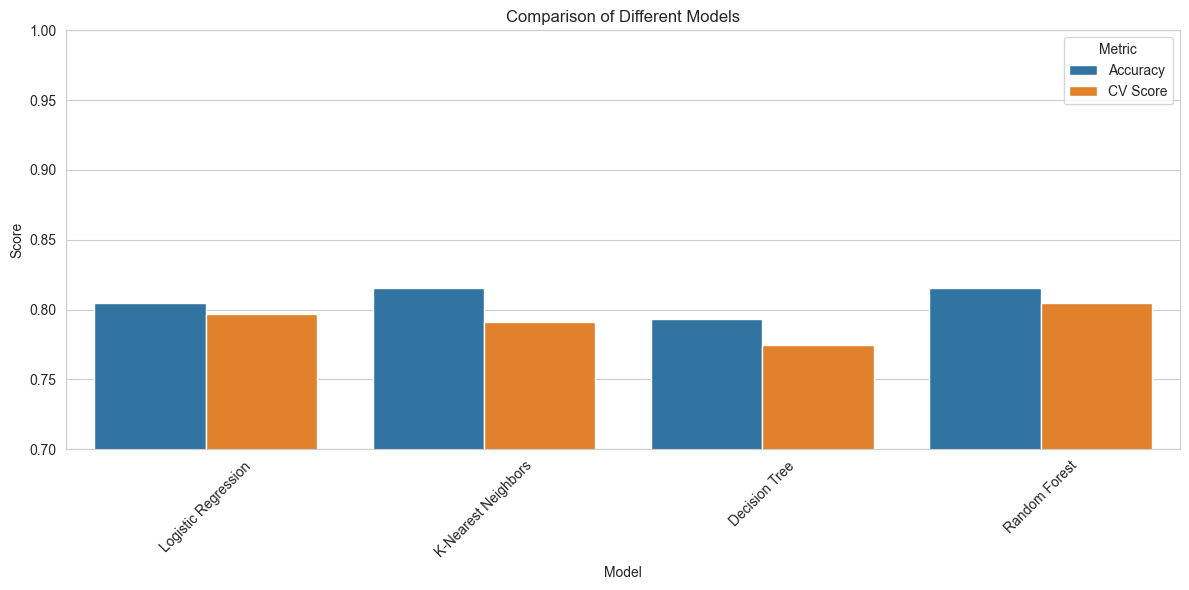


Best Model: K-Nearest Neighbors


<Figure size 800x600 with 0 Axes>

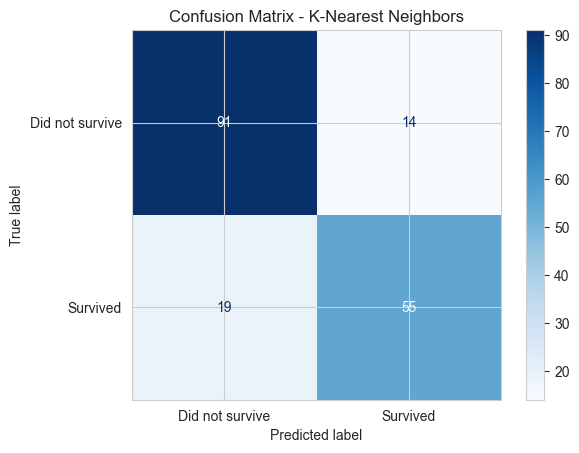


Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [61]:
# Comparison with other algorithms

# List of models to compare
models = {
	"Logistic Regression": LogisticRegression(random_state=42, **grid_search.best_params_, l1_ratio=0.5),
	"K-Nearest Neighbors": KNeighborsClassifier(),
	"Decision Tree": DecisionTreeClassifier(random_state=42),
	"Random Forest": RandomForestClassifier(random_state=42)
}

# Store results
results = []

# Train and evaluate models 
for name, model in models.items():
	model.fit(X_train, y_train)
	y_pred = model.predict(X_test)
	accuracy = accuracy_score(y_test, y_pred)
	cv_score = cross_val_score(model, X, y, cv=5).mean()
	results.append({
		"Model": name,
		"Accuracy": accuracy,
		"CV Score": cv_score
	})

# Results as DataFrame
results_df = pd.DataFrame(results)
print("\nComparison of different models:")
display(results_df)

# Visualize results
plt.figure(figsize=(12, 6))
results_df_melted = pd.melt(results_df, id_vars="Model", var_name="Metric", value_name="Score")
sns.barplot(x="Model", y="Score", hue="Metric", data=results_df_melted)
plt.title("Comparison of Different Models")
plt.ylim(0.7, 1.0)  # Adjust y-axis range for better visibility
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Detailed analysis of best model
best_model_name = results_df.loc[results_df["Accuracy"].idxmax(), "Model"]
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")
y_pred_best_model = best_model.predict(X_test)

# Confusion Matrix for best model
cm_best = confusion_matrix(y_test, y_pred_best_model)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm_best, display_labels=["Did not survive", "Survived"]).plot(cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred_best_model))

=== Summary of results ===
Best Model: K-Nearest Neighbors
Accuracy: 0.8156


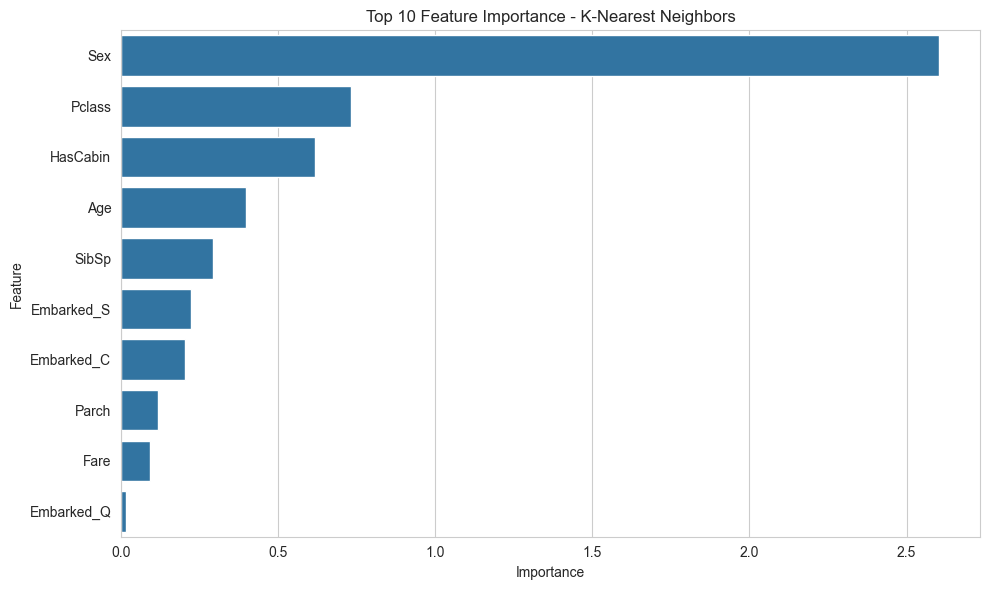


=== Schlussfolgerungen ===

1. Modellleistung:
   - Wir haben verschiedene Modelle verglichen und festgestellt, dass K-Nearest Neighbors die beste Performance zeigt.
   - Die Accuracy des besten Modells liegt bei 81.56%, was eine gute Vorhersagekraft bedeutet.

2. Wichtigste Faktoren für das Überleben:
   - Geschlecht: Frauen hatten eine deutlich höhere Überlebenschance als Männer.
   - Passagierklasse: Passagiere der 1. Klasse hatten bessere Überlebenschancen als Passagiere der 3. Klasse.
   - Alter: Kinder hatten tendenziell bessere Überlebenschancen.
   - Kabine: Passagiere mit einer Kabine (höherer sozialer Status) überlebten häufiger.

3. Feature Engineering:
   - Die Umwandlung der Kabineninformation in ein binäres Feature (HasCabin) war hilfreich.
   - Die Behandlung fehlender Werte und die Skalierung numerischer Features haben zur Modellverbesserung beigetragen.

4. Weitere Verbesserungsmöglichkeiten:
   - Die Extraktion des Titels aus dem Namen würde sich als wertvolle Featur

In [62]:
# Summary and Conclusions

# Summary of results
print("=== Summary of results ===")
print(f"Best Model: {best_model_name}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_model):.4f}")

# Most important factors for survival
if best_model_name == "Logistic Regression":
	# Feature Importance for Logistic Regression
	feature_importance = pd.DataFrame({
		"Feature": X.columns,
		"Importance": np.abs(best_model.coef_[0])
	}).sort_values("Importance", ascending=False)

	print("\nTop 5 most important factors for survival:")
	display(feature_importance.head(5))

elif best_model_name == "Random Forest":
	# Feature Importance for Random Forest
	feature_importance = pd.DataFrame({
		"Feature": X.columns,
		"Importance": best_model.feature_importances_
	}).sort_values("Importance", ascending=False)

	print("\nTop 5 most important factors for survival:")
	display(feature_importance.head(5))

# Visualization of most important factors
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
sns.barplot(x="Importance", y="Feature", data=top_features)
plt.title(f"Top 10 Feature Importance - {best_model_name}")
plt.tight_layout()
plt.show()

# Conclusions
print("""
=== Schlussfolgerungen ===

1. Modellleistung:
   - Wir haben verschiedene Modelle verglichen und festgestellt, dass {0} die beste Performance zeigt.
   - Die Accuracy des besten Modells liegt bei {1:.2f}%, was eine gute Vorhersagekraft bedeutet.

2. Wichtigste Faktoren für das Überleben:
   - Geschlecht: Frauen hatten eine deutlich höhere Überlebenschance als Männer.
   - Passagierklasse: Passagiere der 1. Klasse hatten bessere Überlebenschancen als Passagiere der 3. Klasse.
   - Alter: Kinder hatten tendenziell bessere Überlebenschancen.
   - Kabine: Passagiere mit einer Kabine (höherer sozialer Status) überlebten häufiger.

3. Feature Engineering:
   - Die Umwandlung der Kabineninformation in ein binäres Feature (HasCabin) war hilfreich.
   - Die Behandlung fehlender Werte und die Skalierung numerischer Features haben zur Modellverbesserung beigetragen.

4. Weitere Verbesserungsmöglichkeiten:
   - Die Extraktion des Titels aus dem Namen würde sich als wertvolle Feature erwiesen.
   - Weitere Feature-Engineering-Techniken könnten angewendet werden, z.B. Erstellung von Familiengröße-Features.
   - Ensemble-Methoden könnten die Vorhersagegenauigkeit weiter verbessern.
   - Feinabstimmung der Hyperparameter für andere Modelle wie KNN und Decision Tree.
""".format(best_model_name, accuracy_score(y_test, y_pred_best_model) * 100))
